# Exploratory Data Analysis

___

### Table Of Contents

1. Import libraries as needed
2. Expand maximum range of rows
3. Import athleisure dataset
4. Find total volume per engine
5. Find average search volume each month across all engines
6. Find average volume for each keyword on each search engine
7. Find average volume for each keyword across all search engines
8. Find total volume for each keyword across all search engines
9. Wordclouds for athleisure search volume
10. PDF and CDF for an athleisure keyword having a total search volume

___

### 1. Import libraries as needed

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import requests
import json
import sklearn
from scipy import stats
from scipy.stats import norm
from sklearn.utils import resample
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from wordcloud import WordCloud
import random

___

### 2. Expand maximum range of rows

May be a good idea to expand the maximum range of rows to view in your Pandas dataframes.<br>
Use <b>pd.set_option()</b>

In [3]:
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 3000)
pd.set_option('display.width', 3000)

___

### 3. Import athleisure dataset

In [4]:
df = pd.read_csv("/Users/alexandercheng/Desktop/code/projects/athleisure-ads-strategy/athleisure.csv")
df.head()

,Unnamed: 0,keyword,volume,year,month,engine,total_volume_for_last_12_months,avg_volume_for_last_12_months,total_months_seen,month_abbr
0,0,yoga pants,61,2018,6,google,779,65,12,Jun
1,1,yoga pants,68,2018,7,google,779,65,12,Jul
2,2,yoga pants,107,2018,8,google,779,65,12,Aug
3,3,yoga pants,63,2018,9,google,779,65,12,Sep
4,4,yoga pants,72,2018,10,google,779,65,12,Oct


___

### 4. Find total volume per engine

In [5]:
#load .csv files - previously created from Wordtracker API calls

total_volume_usa_google = pd.read_csv('/Users/alexandercheng/Desktop/code/projects/athleisure-ads-strategy/data/google_stats.csv')
total_volume_usa_youtube = pd.read_csv('/Users/alexandercheng/Desktop/code/projects/athleisure-ads-strategy/data/youtube_stats.csv')
total_volume_usa_amazon = pd.read_csv('/Users/alexandercheng/Desktop/code/projects/athleisure-ads-strategy/data/amazon_stats.csv')

In [6]:
#concat all 3 dataframes into 1

total_volume_usa = pd.concat([total_volume_usa_google, total_volume_usa_youtube, total_volume_usa_amazon])

In [7]:
#only show what we care about - sum, engine, and country

total_volume_usa = total_volume_usa.drop(['max', 'count', 'avg', 'volume'], axis=1)
total_volume_usa = total_volume_usa.sort_values('engine', ascending=True)
total_volume_usa

,sum,engine,country_code
0,11653715,amazon,US
0,594234483,google,US
0,60508218,youtube,US


#### Plot total volume across all 3 search engines

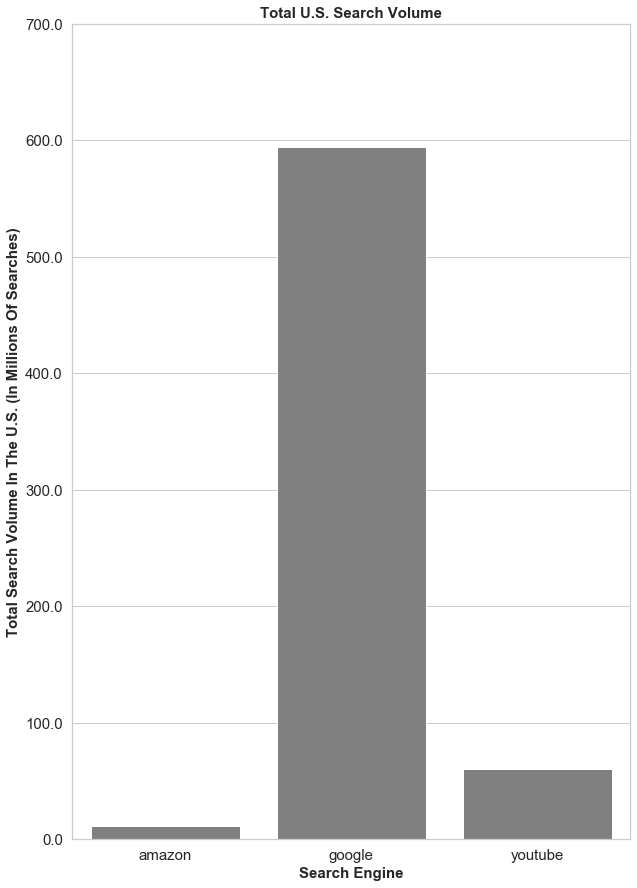

In [8]:
#barplot of total search volume across all 3 major search engines

sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(10,15)
ax = sns.barplot(x="engine", y="sum", ci=None, color='grey', data=total_volume_usa)
plt.xlabel('Search Engine', fontsize=15, weight = 'bold')
plt.ylabel('Total Search Volume In The U.S. (In Millions Of Searches)', fontsize=15, weight = 'bold')
plt.title('Total U.S. Search Volume', fontsize=15, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15, rotation=0)
plt.yticks(ax.get_yticks(), ax.get_yticks()/1000000)
plt.show()

# plt.savefig('Total U.S. Search Volume.pdf', dpi=300)

#### Initial Observations

Between the 3 search engines, <b>Google clearly has the vastest total U.S. search volume compared to YouTube and Amazon.</b> Google's U.S. search volume (about 600 million) in the Wordtracker database is approximately 10x larger than YouTube (about 60 million), and 50x larger than Amazon (about 12 million). Based on this, we might guess that Google will have the largest search volumes for each "athleisure" related keyword, just because of its sheer volume.

#### Plot total volume for ATHLEISURE KEYWORDS ONLY across all 3 search engines

In [9]:
total_volume_keywords_usa = pd.DataFrame(df.groupby('engine').volume.sum())
total_volume_keywords_usa = total_volume_keywords_usa.reset_index()

In [10]:
total_volume_keywords_usa.sort_values('engine', ascending=True)

,engine,volume
0,amazon,3112204
1,google,66634
2,youtube,3995449


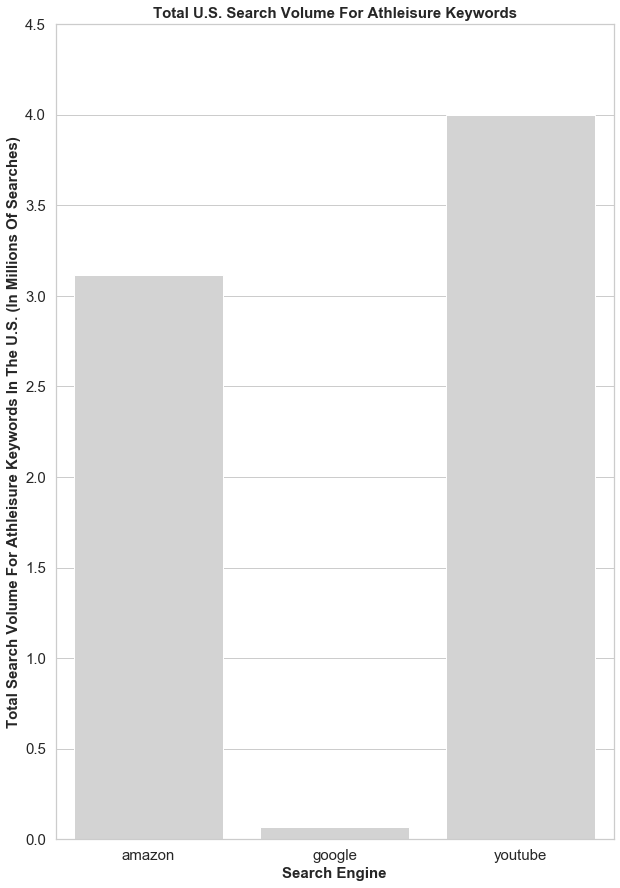

In [11]:
#barplot of total search volume for our 77 keywords only across all 3 major search engines

sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(10,15)
ax = sns.barplot(x="engine", y="volume", ci=None, color='lightgrey', data=total_volume_keywords_usa)
plt.xlabel('Search Engine', fontsize=15, weight = 'bold')
plt.ylabel('Total Search Volume For Athleisure Keywords In The U.S. (In Millions Of Searches)', fontsize=15, weight = 'bold')
plt.title('Total U.S. Search Volume For Athleisure Keywords', fontsize=15, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15, rotation=0)
plt.yticks(ax.get_yticks(), ax.get_yticks()/1000000)
plt.show()

# plt.savefig('Total U.S. Search Volume For Athleisure Keywords.pdf', dpi=300)

#### Initial Observations

Between the 3 search engines, <b>even though Google has the largest search volume compared to YouTube and Amazon, Google has the SMALLEST search volume for "athleisure" related keywords, by a significant margin.</b> For athleisure related keywords, Google only has a meager 67,000 searches in the U.S., whereas Amazon has over 3 million searches, and YouTube has nearly 4 million searches! Based on this finding, it seems that overall search engine volume does not always influence the volume of searching a particular topic. People may be searching more for athleisure related keywords on Amazon and Youtube, much more than on Google, even though Google gets more search volume in general.

In [12]:
athleisure_search_ratio = list(total_volume_keywords_usa['volume'] / total_volume_usa['sum'])
# for some reason 2 "NaN" values showed up - need to .pop() those values away.
athleisure_search_ratio.pop()
athleisure_search_ratio.pop()
athleisure_search_ratio

[0.2670568140717359, 0.00523733322288535, 0.05143440185265413]

In [13]:
search_ratio_df = pd.merge(total_volume_keywords_usa, total_volume_usa)
search_ratio_df

,engine,volume,sum,country_code
0,amazon,3112204,11653715,US
1,google,66634,594234483,US
2,youtube,3995449,60508218,US


In [14]:
search_ratio_df['ratio'] = athleisure_search_ratio
search_ratio_df

,engine,volume,sum,country_code,ratio
0,amazon,3112204,11653715,US,0.267057
1,google,66634,594234483,US,0.005237
2,youtube,3995449,60508218,US,0.051434


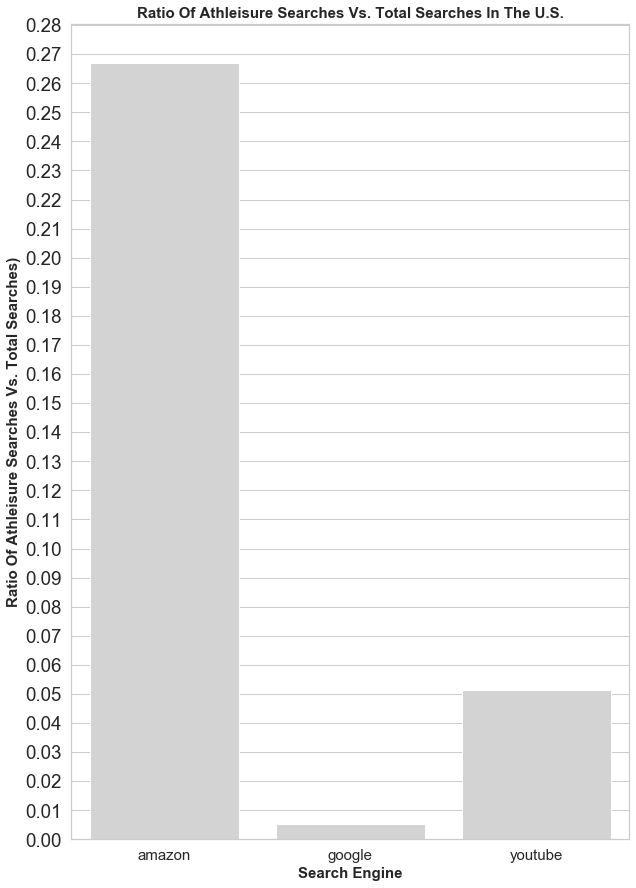

In [16]:
#barplot of total search volume for our 77 keywords only across all 3 major search engines

sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(10,15)
ax = sns.barplot(x="engine", y="ratio", ci=None, color='lightgrey', data=search_ratio_df)
plt.xlabel('Search Engine', fontsize=15, weight = 'bold')
plt.ylabel('Ratio Of Athleisure Searches Vs. Total Searches)', fontsize=15, weight = 'bold')
plt.title('Ratio Of Athleisure Searches Vs. Total Searches In The U.S.', fontsize=15, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=0)
ax.yaxis.set_major_locator(ticker.MultipleLocator(.01))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

# plt.savefig('Ratio Of Athleisure Searches Vs. Total Searches In The U.S.pdf', dpi=300)

#### Initial Observations

Between the 3 search engines, <b>Google has the SMALLEST search ratio for "athleisure" related keywords, while Amazon has the HIGHEST search ratio.</b> "Athleisure" related keywords only represent 0.5% of all Google searches in the U.S., 5% of all YouTube searches in the U.S., and nearly 27% of all Amazon searches in the U.S.! Again, this reinforces the theory that perhaps overall search engine volume does not always influence the volume of searching a particular topic. People may be searching more for athleisure related keywords on Amazon and Youtube, much more than on Google, even though Google gets more search volume in general.

___

### 5. Find average search volume each month across all engines

#### Get DataFrames for each month separately

In [17]:
df_1 = df.loc[df['month']==1]
df_2 = df.loc[df['month']==2]
df_3 = df.loc[df['month']==3]
df_4 = df.loc[df['month']==4]
df_5 = df.loc[df['month']==5]
df_6 = df.loc[df['month']==6]
df_7 = df.loc[df['month']==7]
df_8 = df.loc[df['month']==8]
df_9 = df.loc[df['month']==9]
df_10 = df.loc[df['month']==10]
df_11 = df.loc[df['month']==11]
df_12 = df.loc[df['month']==12]

dfs_by_month = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12]

In [18]:
means = []
for df in dfs_by_month:
    means.append(df['volume'].mean())

In [19]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [20]:
means

[3250.9583333333335,
 3286.5046296296296,
 2351.0694444444443,
 1971.4398148148148,
 1977.6759259259259,
 2702.865740740741,
 2727.3935185185187,
 2428.527777777778,
 2697.722222222222,
 2426.25,
 3531.1111111111113,
 3862.7731481481483]

In [21]:
months_and_means = {'month': months, 'mean': means}
means_by_month = pd.DataFrame(data=months_and_means)
display(means_by_month)
display(means_by_month.describe())

,month,mean
0,Jan,3250.958333
1,Feb,3286.504630
2,Mar,2351.069444
3,Apr,1971.439815
4,May,1977.675926
5,Jun,2702.865741
6,Jul,2727.393519
7,Aug,2428.527778
8,Sep,2697.722222
9,Oct,2426.250000


,mean
count,12.000000
mean,2767.857639
std,599.907456
min,1971.439815
25%,2407.454861
50%,2700.293981
75%,3259.844907
max,3862.773148


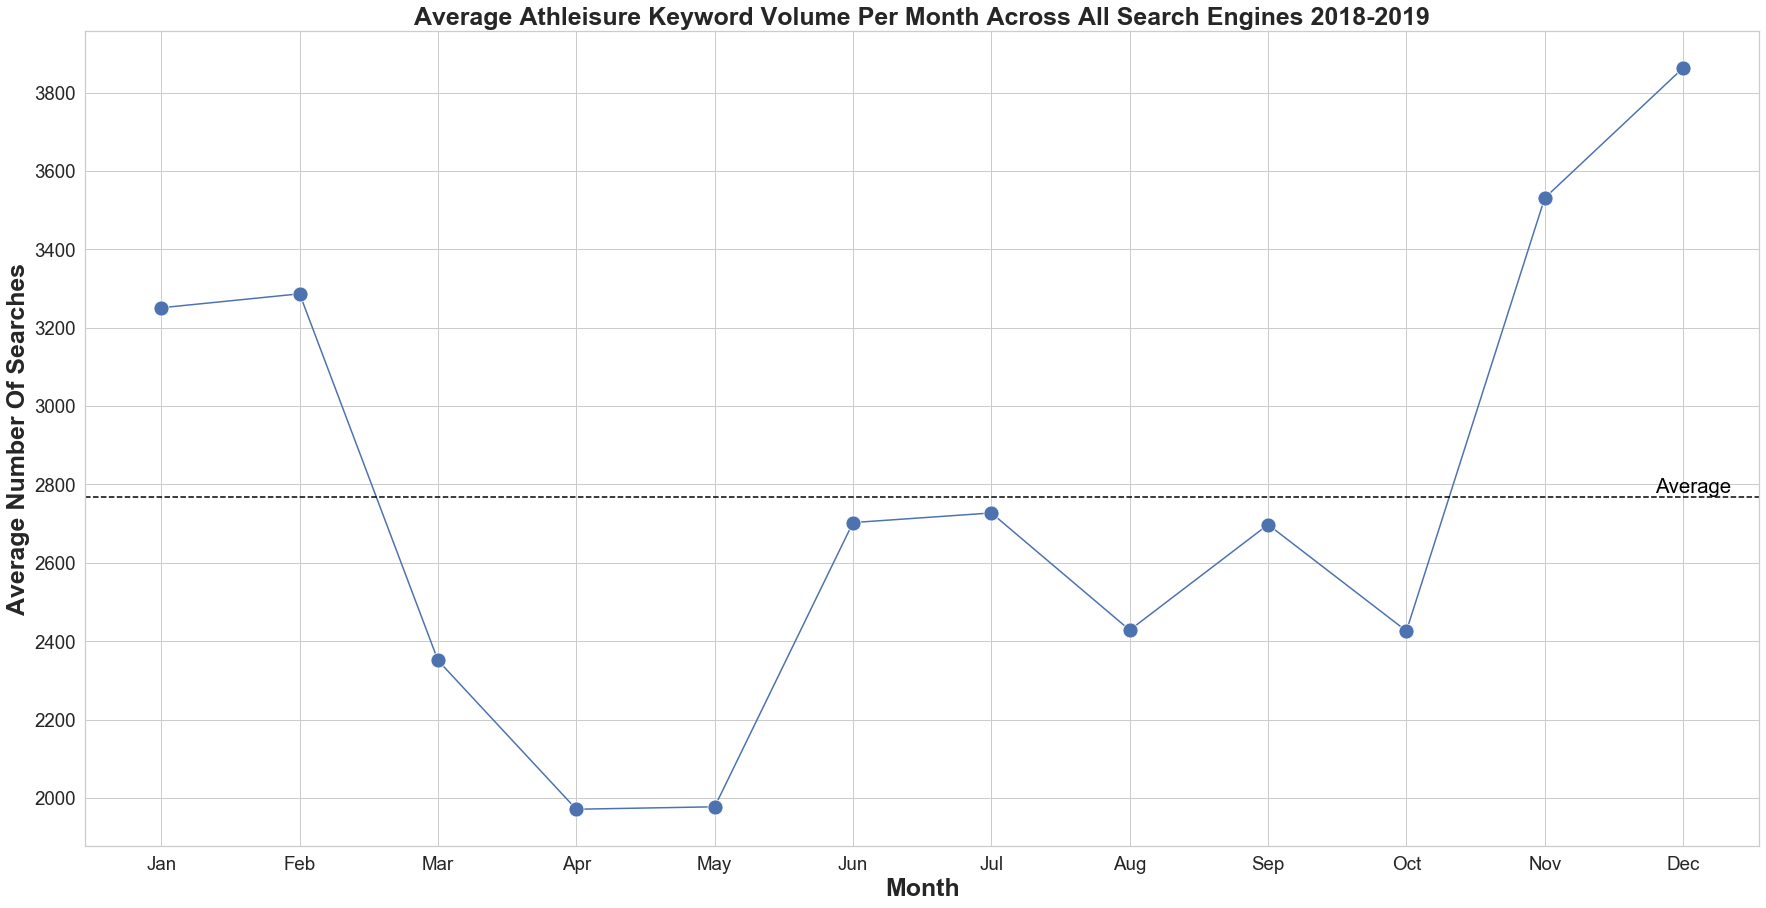

In [22]:
#lineplot of average volumes by month for all selected keywords aggregated across all 3 search engines
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.lineplot(x="month", y="mean", marker="o", ci=0, markersize=15, data=means_by_month, sort=False)
ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.title('Average Athleisure Keyword Volume Per Month Across All Search Engines 2018-2019', fontsize=25, weight = 'bold')
plt.ylabel('Average Number Of Searches', fontsize=25, weight = 'bold')
plt.xlabel('Month', fontsize=25, weight = 'bold')
ax.axhline(2767.857639, ls='--', color='black')
ax.text(10.8,2780, "Average", color='black')
plt.show()

# plt.savefig('Average Athleisure Keyword Volume Per Month Across All Search Engines 2018-2019.pdf', dpi=300)

#### Initial Observations

Across all 3 search engines, the plot suggests that the <b>colder months</b> in the United States have the highest average number of searches regarding "athleisure" related keywords. This includes the months of January, February, November, and December. December is the maximum at an average of 3862 athleisure related searches. June is the minimum with 0 athleisure related searches. The average number of searches across all 3 search engines is about 2767 searches in any given month.

___

### 6. Find average volume for each keyword on each search engine

#### Average volume per keyword on Google

In [23]:
#just get the columns that matter.
df_unique_keywords = df[['keyword', 'avg_volume_for_last_12_months', 'engine']].copy()

#get keywords where engine = "google" only.
df_unique_keywords_google = df_unique_keywords[df_unique_keywords.engine == 'google']

#drop duplicate keywords - you only need 1 that shows the avg_volume.
df_unique_keywords_google = df_unique_keywords_google.drop_duplicates(subset='keyword', keep="first")

df_unique_keywords_google

,keyword,avg_volume_for_last_12_months,engine
6,yoga pants,65,google
18,sweatpants,62,google
30,sweatshirt,288,google
114,crew neck,29,google
126,thumb hole,1,google
138,pullover,19,google
150,fleece,62,google
162,joggers,110,google
174,hoodie,157,google
186,hooded,35,google


#### Renumber index

In [24]:
df_unique_keywords_google = df_unique_keywords_google.reset_index(drop=True)
df_unique_keywords_google = df_unique_keywords_google.sort_values('avg_volume_for_last_12_months', ascending=False)
df_unique_keywords_google

,keyword,avg_volume_for_last_12_months,engine
36,core,575,google
53,movement,559,google
24,stripe,530,google
38,cotton,296,google
2,sweatshirt,288,google
64,running,242,google
28,flex,229,google
46,athletic,224,google
21,striped,188,google
8,hoodie,157,google


In [25]:
display(df_unique_keywords_google.describe())
display(df_unique_keywords_google.min())
display(df_unique_keywords_google.max())

,avg_volume_for_last_12_months
count,77.000000
mean,74.350649
std,118.716687
min,1.000000
25%,7.000000
50%,29.000000
75%,71.000000
max,575.000000


keyword                          3 stripes
avg_volume_for_last_12_months            1
engine                              google
dtype: object

keyword                          yoga pants
avg_volume_for_last_12_months           575
engine                               google
dtype: object

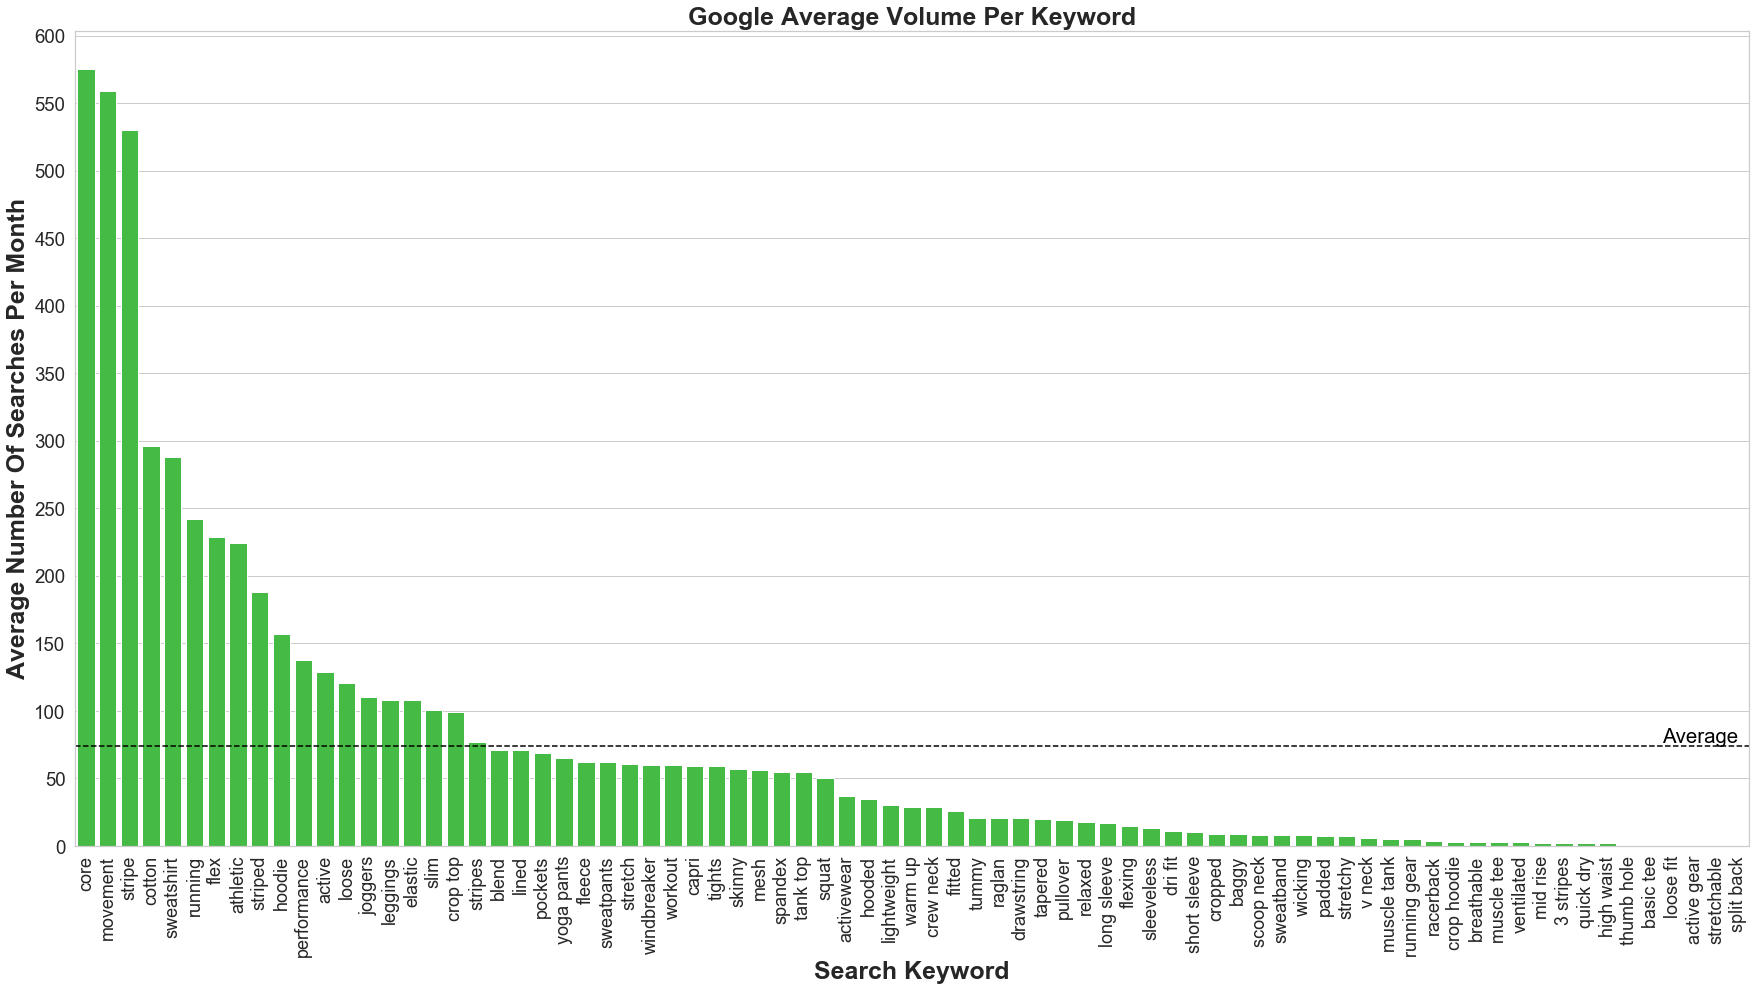

In [26]:
#barplot of average keyword volumes on Google
#find colors here: https://python-graph-gallery.com/196-select-one-color-with-matplotlib/

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.barplot(x="keyword", y="avg_volume_for_last_12_months", ci=None, color='limegreen', data=df_unique_keywords_google)
plt.xlabel('Search Keyword', fontsize=25, weight = 'bold')
plt.ylabel('Average Number Of Searches Per Month', fontsize=25, weight = 'bold')
plt.title('Google Average Volume Per Keyword', fontsize=25, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=90)
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.axhline(74.350649, ls='--', color='black')
ax.text(72.5,77, "Average", color='black')
plt.show()

# plt.savefig('Google Average Volume Per Keyword.pdf', dpi=300)

#### Initial Observations

Given that the Wordtracker database has nearly 600 million Google searches for the United States, it is a bit surprising to see that the maximum average for any given athleisure related keyword in our study is less than 600 searches, and not in the thousands. The average number of athleisure related searches is only about 74 searches per month on Google. The plot shows that there are several outstanding keywords related to athleisure. <b>"Core"</b> is the maximum with an average of 575 searches per month. The minimum is actually 0, not 1 - which the .describe() method provided us above. There are several keywords with a search volume of 0, including: <b>"thumb hole"</b>, <b>"basic tee"</b>, <b>"stretchable"</b>, <b>"loose fit"</b>, and <b>"active gear"</b>.

#### Average volume per keyword on YouTube

In [27]:
#just get the columns that matter.
df_unique_keywords = df[['keyword', 'avg_volume_for_last_12_months', 'engine']].copy()

#get keywords where engine = "youtube" only.
df_unique_keywords_youtube = df_unique_keywords[df_unique_keywords.engine == 'youtube']

#drop duplicate keywords - you only need 1 that shows the avg_volume.
df_unique_keywords_youtube = df_unique_keywords_youtube.drop_duplicates(subset='keyword', keep="first")

df_unique_keywords_youtube

,keyword,avg_volume_for_last_12_months,engine
42,yoga pants,1031,youtube
54,sweatpants,1785,youtube
66,sweatshirt,69710,youtube
234,thumb hole,1,youtube
246,pullover,14,youtube
258,fleece,24,youtube
270,hoodie,76026,youtube
282,hooded,29,youtube
294,capri,2,youtube
306,muscle tee,1,youtube


#### Renumber index

In [28]:
df_unique_keywords_youtube = df_unique_keywords_youtube.reset_index(drop=True)
df_unique_keywords_youtube = df_unique_keywords_youtube.sort_values('avg_volume_for_last_12_months', ascending=False)
df_unique_keywords_youtube

,keyword,avg_volume_for_last_12_months,engine
6,hoodie,76026,youtube
2,sweatshirt,69710,youtube
55,running,55537,youtube
24,flex,31618,youtube
48,workout,20837,youtube
33,cotton,18547,youtube
41,performance,11027,youtube
36,slim,7622,youtube
47,skinny,5960,youtube
46,movement,5046,youtube


In [29]:
display(df_unique_keywords_youtube.describe())
display(df_unique_keywords_youtube.min())
display(df_unique_keywords_youtube.max())

,avg_volume_for_last_12_months
count,66.000000
mean,5044.909091
std,14751.237507
min,0.000000
25%,1.000000
50%,26.500000
75%,1878.000000
max,76026.000000


keyword                          3 stripes
avg_volume_for_last_12_months            0
engine                             youtube
dtype: object

keyword                          yoga pants
avg_volume_for_last_12_months         76026
engine                              youtube
dtype: object

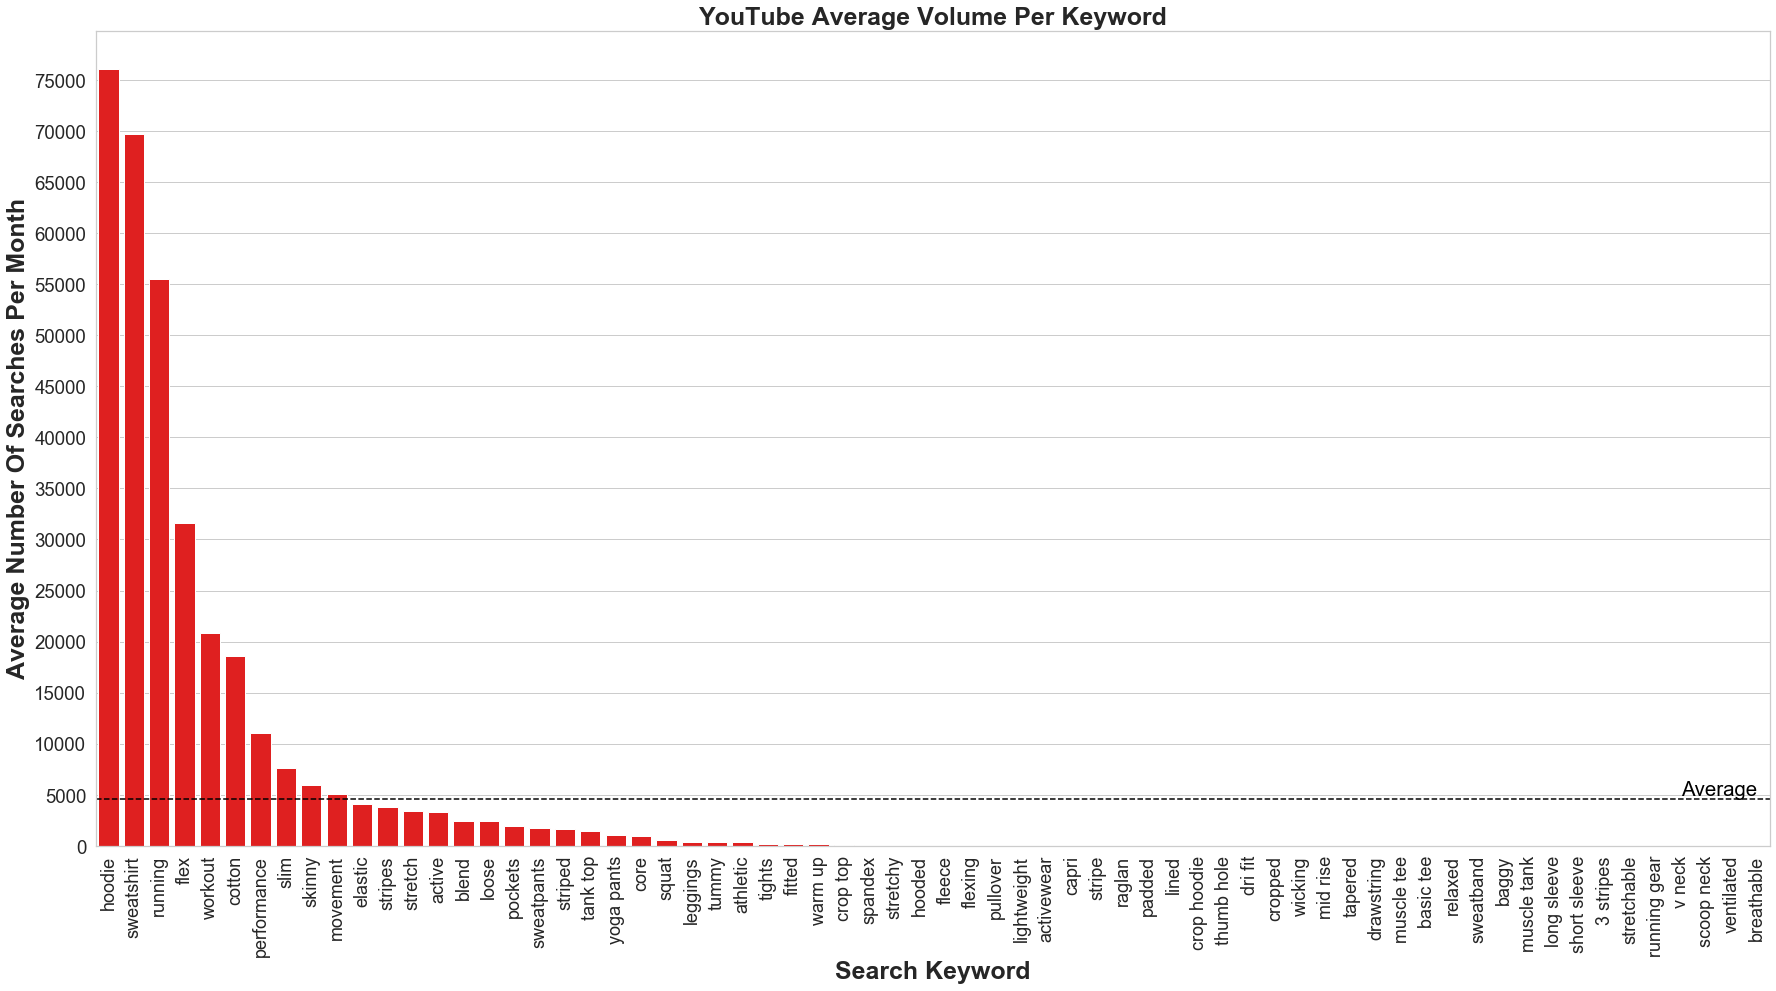

In [30]:
#barplot of average keyword volumes on YouTube

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.barplot(x="keyword", y="avg_volume_for_last_12_months", ci=None, color='red', data=df_unique_keywords_youtube)
plt.xlabel('Search Keyword', fontsize=25, weight = 'bold')
plt.ylabel('Average Number Of Searches Per Month', fontsize=25, weight = 'bold')
plt.title('YouTube Average Volume Per Keyword', fontsize=25, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=90)
ax.yaxis.set_major_locator(ticker.MultipleLocator(5000))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.axhline(4629.530303, ls='--', color='black')
ax.text(62,5000, "Average", color='black')
plt.show()

# plt.savefig('YouTube Average Volume Per Keyword.pdf', dpi=300)

#### Initial Observations

The results for YouTube are very surprising compared to the plot of average keyword volume for Google searches. <b>Average search volume for "athleisure" related terms is much higher on YouTube than Google.</b> The average number of athleisure related searches per month is a whooping 4630 on YouTube, compared to a tiny 74 searches per month on Google! The plot shows dramatically high-performing keywords related to athleisure. <b>"Hoodie"</b> is the maximum with an average of 69,691 searches per month. The keywords: <b>"sweatshirt"</b> and <b>"running"</b> also have very high search volume averages.  The minimum is actually 0, not 1 - which the .describe() method provided us above. There are several keywords with a search volume of 0 here, just like Google searches.

#### Average volume per keyword on Amazon

In [31]:
#just get the columns that matter.
df_unique_keywords = df[['keyword', 'avg_volume_for_last_12_months', 'engine']].copy()

#get keywords where engine = "amazon" only.
df_unique_keywords_amazon = df_unique_keywords[df_unique_keywords.engine == 'amazon']

#drop duplicate keywords - you only need 1 that shows the avg_volume.
df_unique_keywords_amazon = df_unique_keywords_amazon.drop_duplicates(subset='keyword', keep="first")

df_unique_keywords_amazon

,keyword,avg_volume_for_last_12_months,engine
78,yoga pants,7731,amazon
90,sweatpants,10977,amazon
102,sweatshirt,9553,amazon
330,crew neck,180,amazon
342,thumb hole,33,amazon
354,pullover,1442,amazon
366,fleece,4317,amazon
378,joggers,19603,amazon
390,hoodie,31552,amazon
402,hooded,974,amazon


#### Renumber index

In [32]:
df_unique_keywords_amazon = df_unique_keywords_amazon.reset_index(drop=True)
df_unique_keywords_amazon = df_unique_keywords_amazon.sort_values('avg_volume_for_last_12_months', ascending=False)
df_unique_keywords_amazon

,keyword,avg_volume_for_last_12_months,engine
51,workout,35410,amazon
8,hoodie,31552,amazon
15,leggings,21195,amazon
7,joggers,19603,amazon
60,running,13204,amazon
38,slim,10987,amazon
1,sweatpants,10977,amazon
2,sweatshirt,9553,amazon
18,long sleeve,8276,amazon
34,cotton,8018,amazon


In [33]:
display(df_unique_keywords_amazon.describe())
display(df_unique_keywords_amazon.min())
display(df_unique_keywords_amazon.max())

,avg_volume_for_last_12_months
count,72.000000
mean,3601.902778
std,6688.280781
min,3.000000
25%,157.750000
50%,847.500000
75%,4290.750000
max,35410.000000


keyword                          active
avg_volume_for_last_12_months         3
engine                           amazon
dtype: object

keyword                          yoga pants
avg_volume_for_last_12_months         35410
engine                               amazon
dtype: object

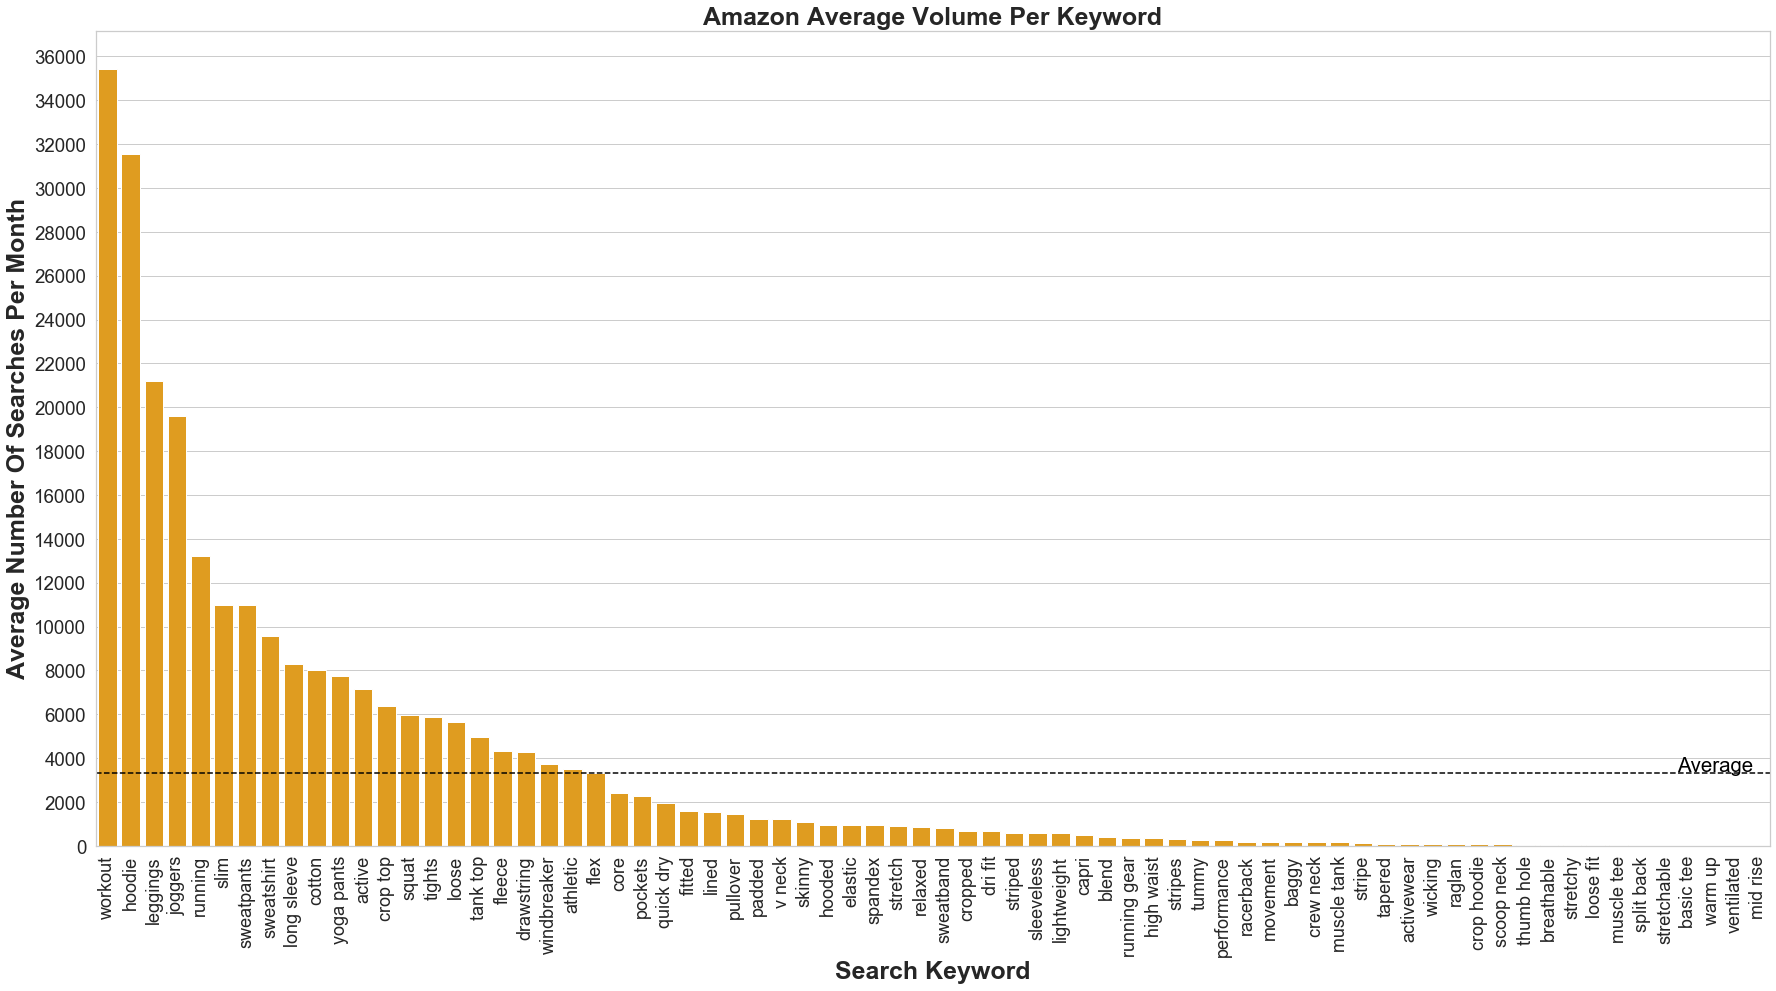

In [34]:
#barplot of average keyword volumes on Amazon

sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.barplot(x="keyword", y="avg_volume_for_last_12_months", ci=None, color='orange', data=df_unique_keywords_amazon)
plt.xlabel('Search Keyword', fontsize=25, weight = 'bold')
plt.ylabel('Average Number Of Searches Per Month', fontsize=25, weight = 'bold')
plt.title('Amazon Average Volume Per Keyword', fontsize=25, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=90)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2000))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.axhline(3307.652778, ls='--', color='black')
ax.text(67.5,3400, "Average", color='black')
plt.show()

# plt.savefig('Amazon Average Volume Per Keyword.pdf', dpi=300)

#### Initial Observations

The results for Amazon are also very surprising compared to Google. <b>Average search volume for "athleisure" related terms is much higher on Amazon than Google, but less than YouTube.</b> The average number of athleisure related searches per month on Amazon is 3307, which is less than 4630 per month on YouTube, and much more than 74 searches per month on Google. Like YouTube, the Amazon plot above shows some very high-performing keywords related to athleisure. <b>"Workout"</b> is the maximum with an average of 32,460 searches per month. <b>"Hoodie"</b> is a close second, with <b>"leggings"</b> and <b>"joggers"</b> also at high search volume averages. The minimum is actually 0, not 1 - which the .describe() method provided us above. There are several keywords with a search volume of 0 here, just like Google and YouTube searches.

___

### 7. Find average volume for each keyword across all search engines

#### Average volume per keyword across all search engines

In [35]:
all_engines_1 = df_unique_keywords_google.merge(df_unique_keywords_youtube, on='keyword', how='outer')
all_engines = all_engines_1.merge(df_unique_keywords_amazon, on='keyword', how='outer')
all_engines = all_engines.fillna(0)
all_engines

,keyword,avg_volume_for_last_12_months_x,engine_x,avg_volume_for_last_12_months_y,engine_y,avg_volume_for_last_12_months,engine
0,core,575,google,964.0,youtube,2416.0,amazon
1,movement,559,google,5046.0,youtube,193.0,amazon
2,stripe,530,google,2.0,youtube,112.0,amazon
3,cotton,296,google,18547.0,youtube,8018.0,amazon
4,sweatshirt,288,google,69710.0,youtube,9553.0,amazon
5,running,242,google,55537.0,youtube,13204.0,amazon
6,flex,229,google,31618.0,youtube,3343.0,amazon
7,athletic,224,google,343.0,youtube,3496.0,amazon
8,striped,188,google,1662.0,youtube,601.0,amazon
9,hoodie,157,google,76026.0,youtube,31552.0,amazon


In [36]:
all_engines['avg_volume_all_engines'] = all_engines['avg_volume_for_last_12_months_x'] + all_engines['avg_volume_for_last_12_months_y'] + all_engines['avg_volume_for_last_12_months']
all_engines['avg_volume_all_engines'] = all_engines['avg_volume_all_engines']/3
all_engines

,keyword,avg_volume_for_last_12_months_x,engine_x,avg_volume_for_last_12_months_y,engine_y,avg_volume_for_last_12_months,engine,avg_volume_all_engines
0,core,575,google,964.0,youtube,2416.0,amazon,1318.333333
1,movement,559,google,5046.0,youtube,193.0,amazon,1932.666667
2,stripe,530,google,2.0,youtube,112.0,amazon,214.666667
3,cotton,296,google,18547.0,youtube,8018.0,amazon,8953.666667
4,sweatshirt,288,google,69710.0,youtube,9553.0,amazon,26517.000000
5,running,242,google,55537.0,youtube,13204.0,amazon,22994.333333
6,flex,229,google,31618.0,youtube,3343.0,amazon,11730.000000
7,athletic,224,google,343.0,youtube,3496.0,amazon,1354.333333
8,striped,188,google,1662.0,youtube,601.0,amazon,817.000000
9,hoodie,157,google,76026.0,youtube,31552.0,amazon,35911.666667


In [37]:
del all_engines['avg_volume_for_last_12_months_x']
del all_engines['avg_volume_for_last_12_months_y']
del all_engines['avg_volume_for_last_12_months']
del all_engines['engine_x']
del all_engines['engine_y']
del all_engines['engine']
all_engines

,keyword,avg_volume_all_engines
0,core,1318.333333
1,movement,1932.666667
2,stripe,214.666667
3,cotton,8953.666667
4,sweatshirt,26517.000000
5,running,22994.333333
6,flex,11730.000000
7,athletic,1354.333333
8,striped,817.000000
9,hoodie,35911.666667


In [38]:
all_engines = all_engines.sort_values('avg_volume_all_engines', ascending=False)
all_engines

,keyword,avg_volume_all_engines
9,hoodie,35911.666667
4,sweatshirt,26517.000000
5,running,22994.333333
27,workout,18769.000000
6,flex,11730.000000
3,cotton,8953.666667
14,leggings,7228.000000
13,joggers,6571.000000
16,slim,6236.666667
24,sweatpants,4274.666667


In [39]:
all_engines.describe()

,avg_volume_all_engines
count,77.000000
mean,2588.857143
std,6101.677674
min,0.333333
25%,43.666667
50%,347.333333
75%,2056.000000
max,35911.666667


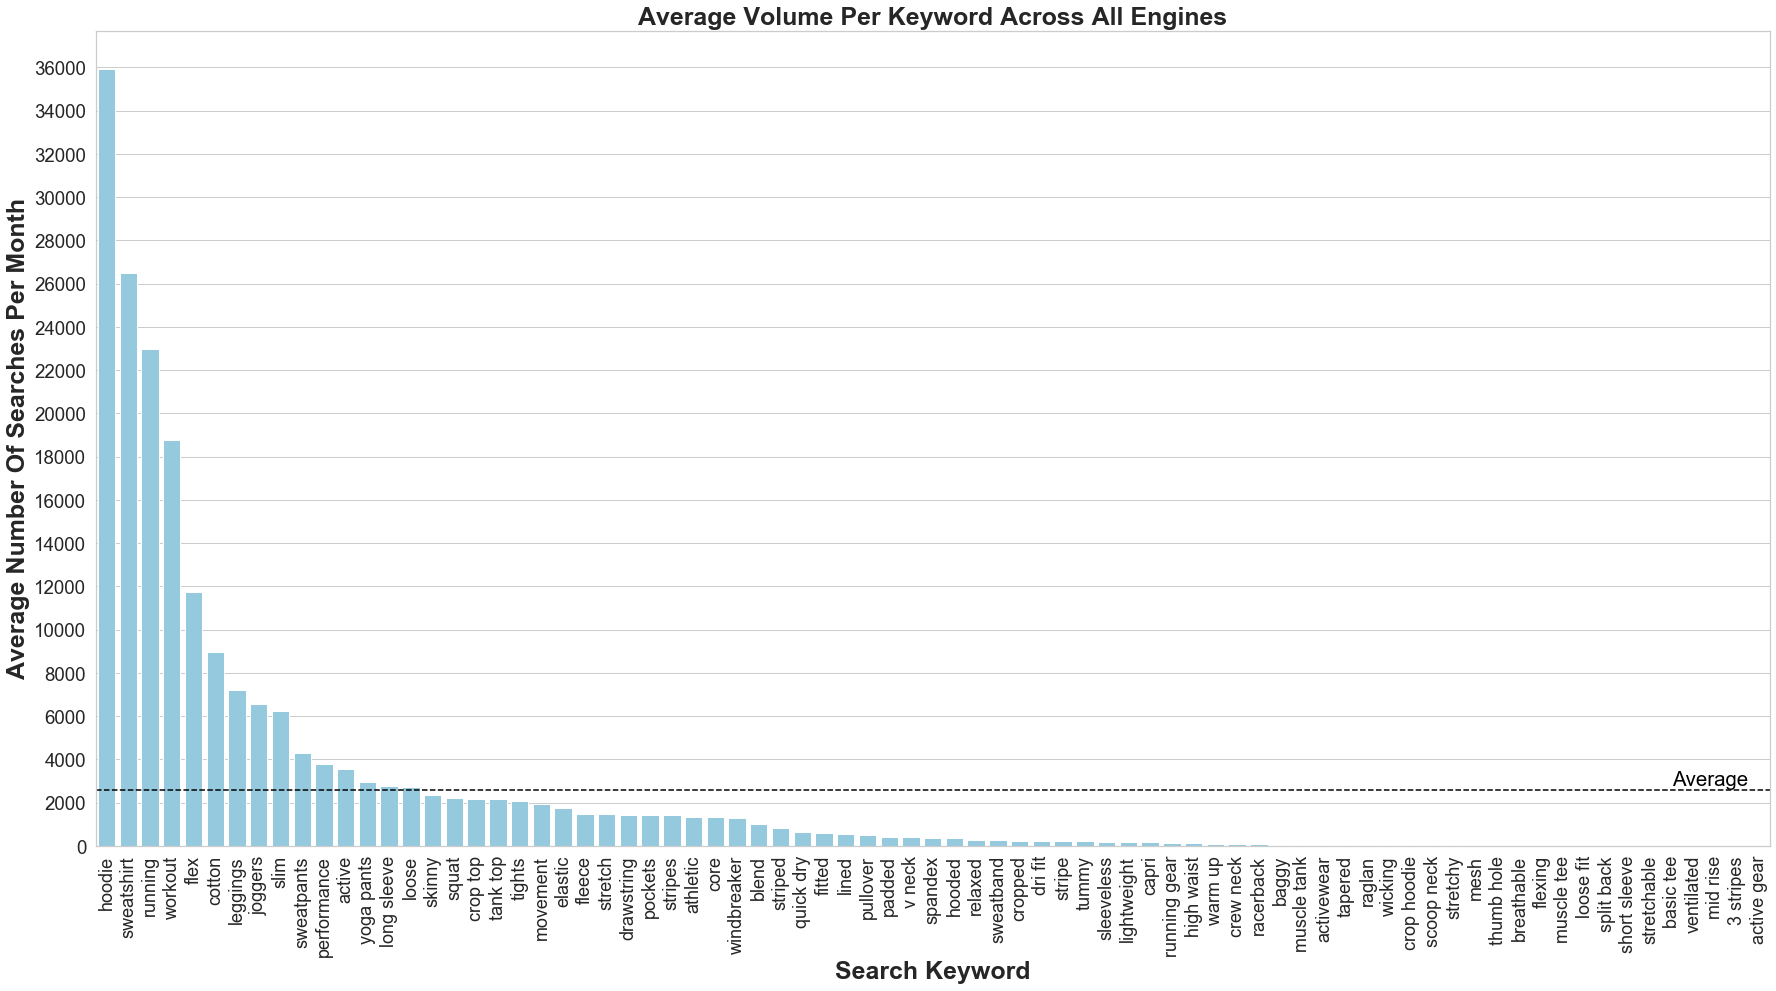

In [40]:
#barplot of AVERAGE keyword volumes across all 3 engines

sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.barplot(x="keyword", y="avg_volume_all_engines", ci=None, color='skyblue', data=all_engines)
plt.xlabel('Search Keyword', fontsize=25, weight = 'bold')
plt.ylabel('Average Number Of Searches Per Month', fontsize=25, weight = 'bold')
plt.title('Average Volume Per Keyword Across All Engines', fontsize=25, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=90)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2000))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.axhline(2588.857143, ls='--', color='black')
ax.text(72,2800, "Average", color='black')
plt.show()

# plt.savefig('Average Volume Per Keyword Across All Engines.pdf', dpi=300)

### 8. Find total volume for each keyword across all search engines

#### Total volume per keyword across all search engines

In [41]:
df_unique_keywords_total = df[['keyword', 'total_volume_for_last_12_months', 'engine']].copy()

df_unique_keywords_total_google = df_unique_keywords_total[df_unique_keywords_total.engine == 'google']
df_unique_keywords_total_google = df_unique_keywords_total_google.drop_duplicates(subset='keyword', keep="first")

df_unique_keywords_total_youtube = df_unique_keywords_total[df_unique_keywords_total.engine == 'youtube']
df_unique_keywords_total_youtube = df_unique_keywords_total_youtube.drop_duplicates(subset='keyword', keep="first")

df_unique_keywords_total_amazon = df_unique_keywords_total[df_unique_keywords_total.engine == 'amazon']
df_unique_keywords_total_amazon = df_unique_keywords_total_amazon.drop_duplicates(subset='keyword', keep="first")

In [42]:
total_engines_1 = df_unique_keywords_total_google.merge(df_unique_keywords_total_youtube, on='keyword', how='outer')
total_engines = total_engines_1.merge(df_unique_keywords_total_amazon, on='keyword', how='outer')
total_engines = total_engines.fillna(0)
total_engines

,keyword,total_volume_for_last_12_months_x,engine_x,total_volume_for_last_12_months_y,engine_y,total_volume_for_last_12_months,engine
0,yoga pants,779,google,12380.0,youtube,92782.0,amazon
1,sweatpants,750,google,21420.0,youtube,131726.0,amazon
2,sweatshirt,3455,google,836526.0,youtube,114641.0,amazon
3,crew neck,353,google,0.0,0,2151.0,amazon
4,thumb hole,4,google,1.0,youtube,385.0,amazon
5,pullover,227,google,169.0,youtube,17303.0,amazon
6,fleece,740,google,279.0,youtube,51804.0,amazon
7,joggers,1320,google,0.0,0,235238.0,amazon
8,hoodie,1883,google,912316.0,youtube,378631.0,amazon
9,hooded,419,google,357.0,youtube,11695.0,amazon


In [43]:
total_engines['total_volume_all_engines'] = total_engines['total_volume_for_last_12_months_x'] + total_engines['total_volume_for_last_12_months_y'] + total_engines['total_volume_for_last_12_months']
total_engines

,keyword,total_volume_for_last_12_months_x,engine_x,total_volume_for_last_12_months_y,engine_y,total_volume_for_last_12_months,engine,total_volume_all_engines
0,yoga pants,779,google,12380.0,youtube,92782.0,amazon,105941.0
1,sweatpants,750,google,21420.0,youtube,131726.0,amazon,153896.0
2,sweatshirt,3455,google,836526.0,youtube,114641.0,amazon,954622.0
3,crew neck,353,google,0.0,0,2151.0,amazon,2504.0
4,thumb hole,4,google,1.0,youtube,385.0,amazon,390.0
5,pullover,227,google,169.0,youtube,17303.0,amazon,17699.0
6,fleece,740,google,279.0,youtube,51804.0,amazon,52823.0
7,joggers,1320,google,0.0,0,235238.0,amazon,236558.0
8,hoodie,1883,google,912316.0,youtube,378631.0,amazon,1292830.0
9,hooded,419,google,357.0,youtube,11695.0,amazon,12471.0


In [44]:
del total_engines['total_volume_for_last_12_months_x']
del total_engines['total_volume_for_last_12_months_y']
del total_engines['total_volume_for_last_12_months']
del total_engines['engine_x']
del total_engines['engine_y']
del total_engines['engine']
total_engines

,keyword,total_volume_all_engines
0,yoga pants,105941.0
1,sweatpants,153896.0
2,sweatshirt,954622.0
3,crew neck,2504.0
4,thumb hole,390.0
5,pullover,17699.0
6,fleece,52823.0
7,joggers,236558.0
8,hoodie,1292830.0
9,hooded,12471.0


In [45]:
total_engines = total_engines.sort_values('total_volume_all_engines', ascending=False)
total_engines

,keyword,total_volume_all_engines
8,hoodie,1292830.0
2,sweatshirt,954622.0
64,running,827811.0
55,workout,675692.0
28,flex,422286.0
38,cotton,322339.0
15,leggings,260223.0
7,joggers,236558.0
42,slim,224540.0
1,sweatpants,153896.0


In [46]:
total_engines.describe()

,total_volume_all_engines
count,7.700000e+01
mean,9.319944e+04
std,2.196640e+05
min,1.200000e+01
25%,1.554000e+03
50%,1.251000e+04
75%,7.401700e+04
max,1.292830e+06


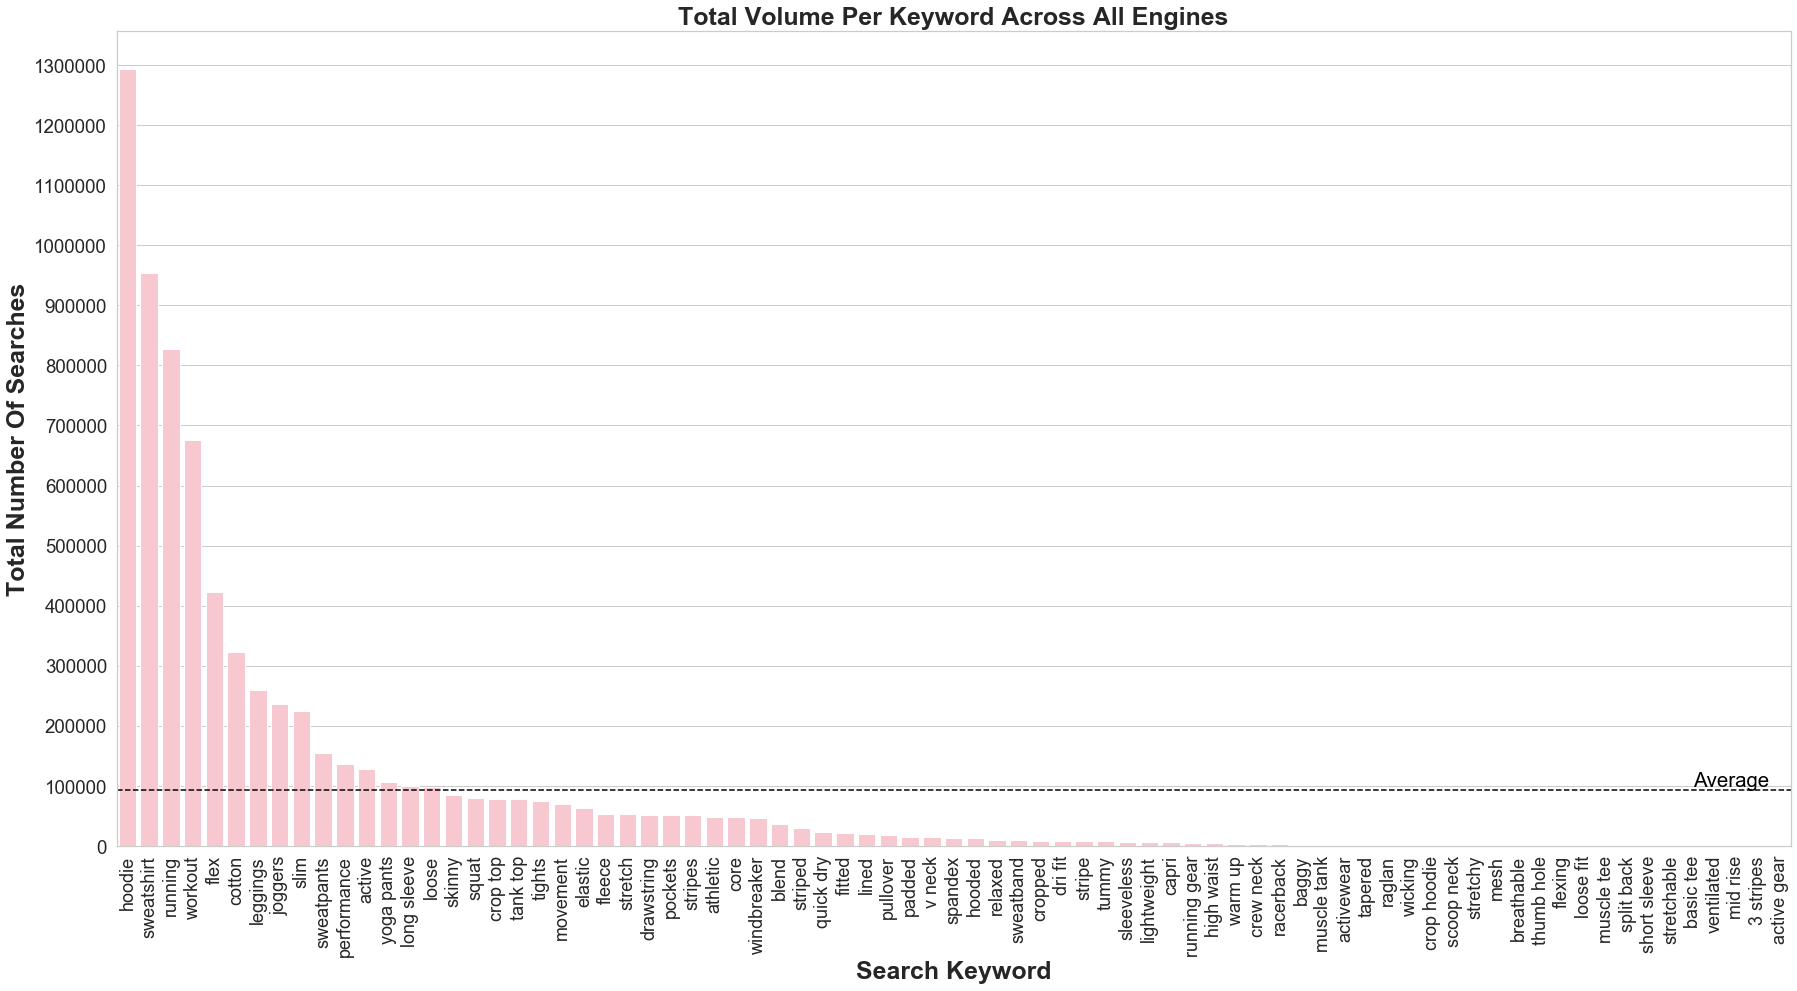

In [47]:
#barplot of TOTAL keyword volumes across all 3 engines

sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.barplot(x="keyword", y="total_volume_all_engines", ci=None, color='pink', data=total_engines)
plt.xlabel('Search Keyword', fontsize=25, weight = 'bold')
plt.ylabel('Total Number Of Searches', fontsize=25, weight = 'bold')
plt.title('Total Volume Per Keyword Across All Engines', fontsize=25, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=90)
ax.yaxis.set_major_locator(ticker.MultipleLocator(100000))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.axhline(93199.44, ls='--', color='black')
ax.text(72,100000, "Average", color='black')
plt.show()

# plt.savefig('Total Volume Per Keyword Across All Engines.pdf', dpi=300)

___

### 9. Wordclouds for athleisure search volume

#### Wordcloud for Google athleisure search volume

In [48]:
word_cloud_google = df_unique_keywords_google.drop('engine', axis=1)
word_cloud_google = word_cloud_google.rename(columns={"keyword": "keyword", "avg_volume_for_last_12_months": "volume"})
word_cloud_google

,keyword,volume
36,core,575
53,movement,559
24,stripe,530
38,cotton,296
2,sweatshirt,288
64,running,242
28,flex,229
46,athletic,224
21,striped,188
8,hoodie,157


In [49]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

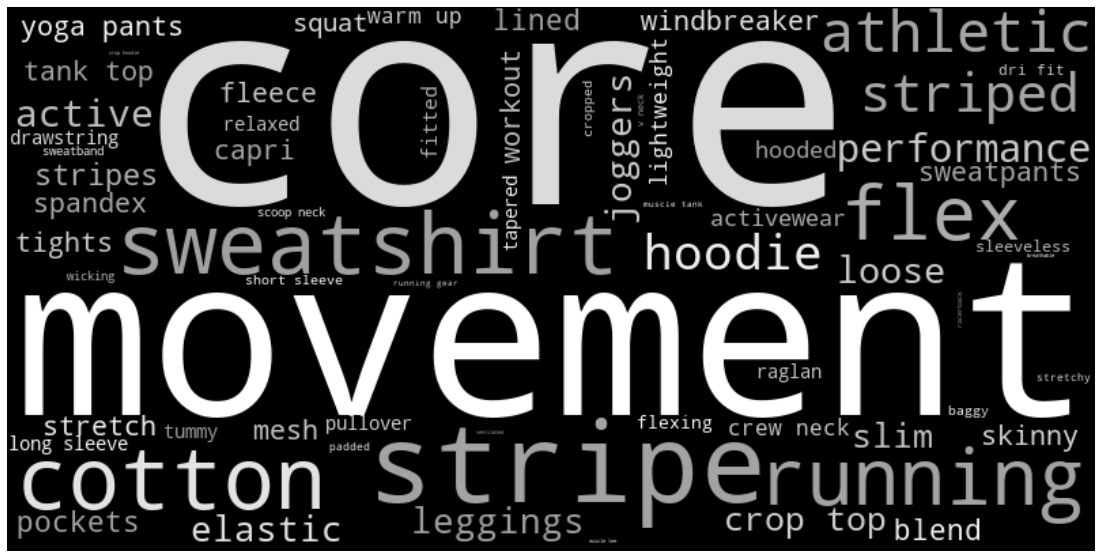

In [171]:
d = {}
for keyword, volume in word_cloud_google.values:
    d[keyword] = volume

wc = WordCloud(width=800, height=400)
plt.figure(figsize=(20,10))
wc.generate_from_frequencies(frequencies=d)
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")
plt.axis("off")
plt.show()
# wc.to_file("word_cloud_google.jpg")

#### Wordcloud for YouTube athleisure search volume

In [116]:
word_cloud_youtube = df_unique_keywords_youtube.drop('engine', axis=1)
word_cloud_youtube = word_cloud_youtube.rename(columns={"keyword": "keyword", "avg_volume_for_last_12_months": "volume"})
word_cloud_youtube

,keyword,volume
0,yoga pants,1031
1,sweatpants,1785
2,sweatshirt,69710
3,thumb hole,1
4,pullover,14
5,fleece,24
6,hoodie,76026
7,hooded,29
8,capri,2
9,muscle tee,1


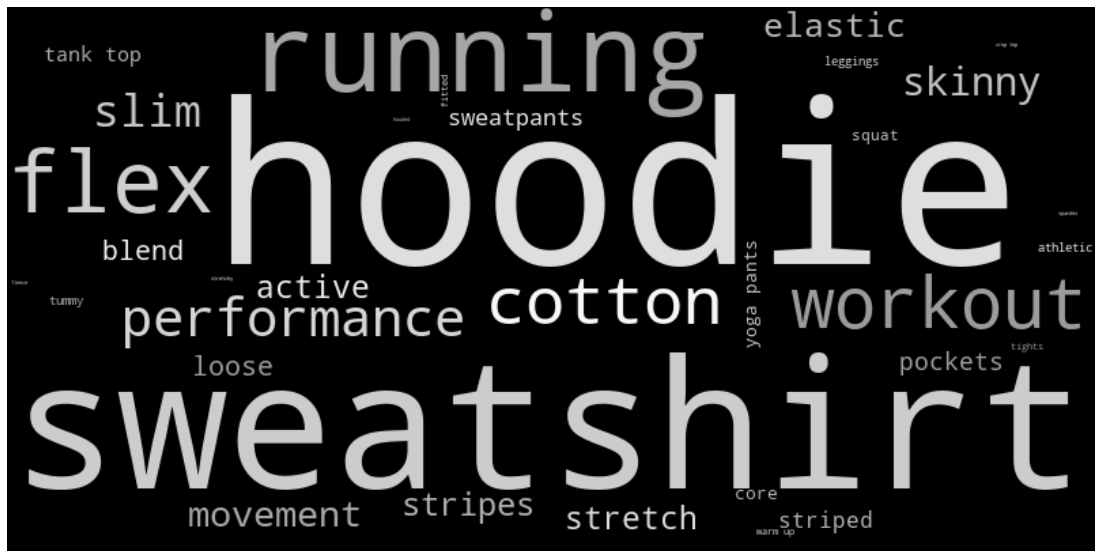

In [321]:
d = {}
for keyword, volume in word_cloud_youtube.values:
    d[keyword] = volume

wc = WordCloud(width=800, height=400)
plt.figure(figsize=(20,10))
wc.generate_from_frequencies(frequencies=d)
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")
plt.axis("off")
plt.show()
# wc.to_file("word_cloud_youtube.jpg")

#### Wordcloud for Amazon athleisure search volume

In [118]:
word_cloud_amazon = df_unique_keywords_amazon.drop('engine', axis=1)
word_cloud_amazon = word_cloud_amazon.rename(columns={"keyword": "keyword", "avg_volume_for_last_12_months": "volume"})
word_cloud_amazon

,keyword,volume
0,yoga pants,7731
1,sweatpants,10977
2,sweatshirt,9553
3,crew neck,180
4,thumb hole,33
5,pullover,1442
6,fleece,4317
7,joggers,19603
8,hoodie,31552
9,hooded,974


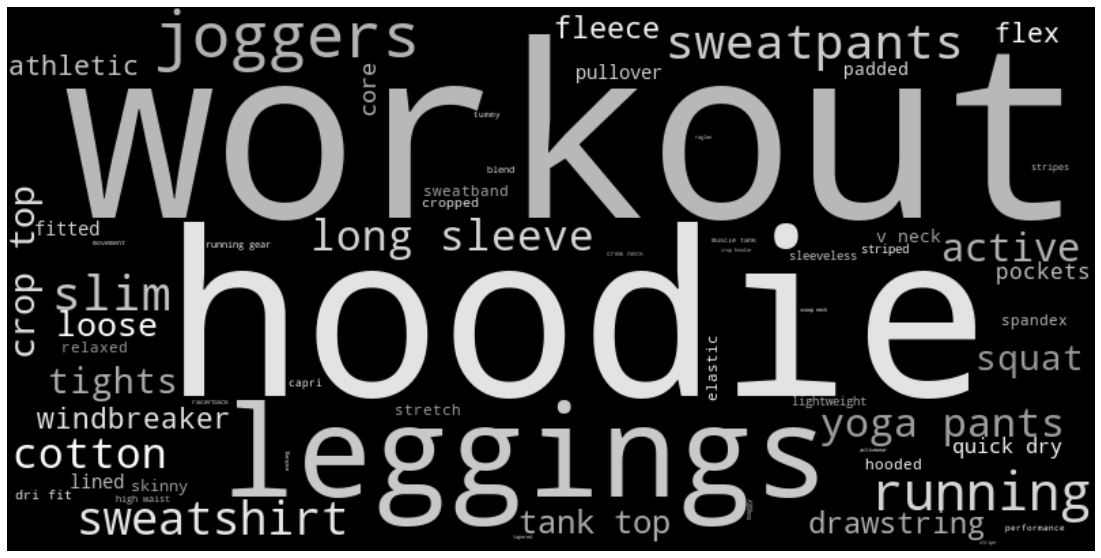

In [322]:
d = {}
for keyword, volume in word_cloud_amazon.values:
    d[keyword] = volume
    
wc = WordCloud(width=800, height=400)
plt.figure(figsize=(20,10))
wc.generate_from_frequencies(frequencies=d)
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=1),interpolation="bilinear")
plt.axis("off")
plt.show()
# wc.to_file("word_cloud_amazon.jpg")

In [324]:
word_cloud_total

,keyword,total_volume_all_engines
8,hoodie,1292830.0
2,sweatshirt,954622.0
64,running,827811.0
55,workout,675692.0
28,flex,422286.0
38,cotton,322339.0
15,leggings,260223.0
7,joggers,236558.0
42,slim,224540.0
1,sweatpants,153896.0


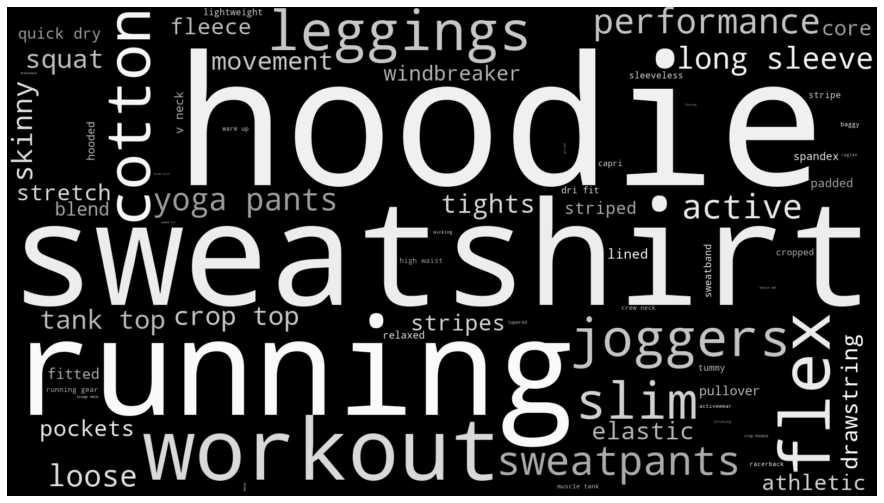

In [361]:
word_cloud_total = total_engines

d = {}
for keyword, total_volume_all_engines in word_cloud_total.values:
    d[keyword] = total_volume_all_engines
    
wc = WordCloud(width=1600, height=900)
plt.figure(figsize=(16,9))
wc.generate_from_frequencies(frequencies=d)
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")
plt.axis("off")
plt.show()
# wc.to_file("word_cloud_total.jpg")

___

### 10. PDF and CDF for athleisure keywords having a particular total search volume

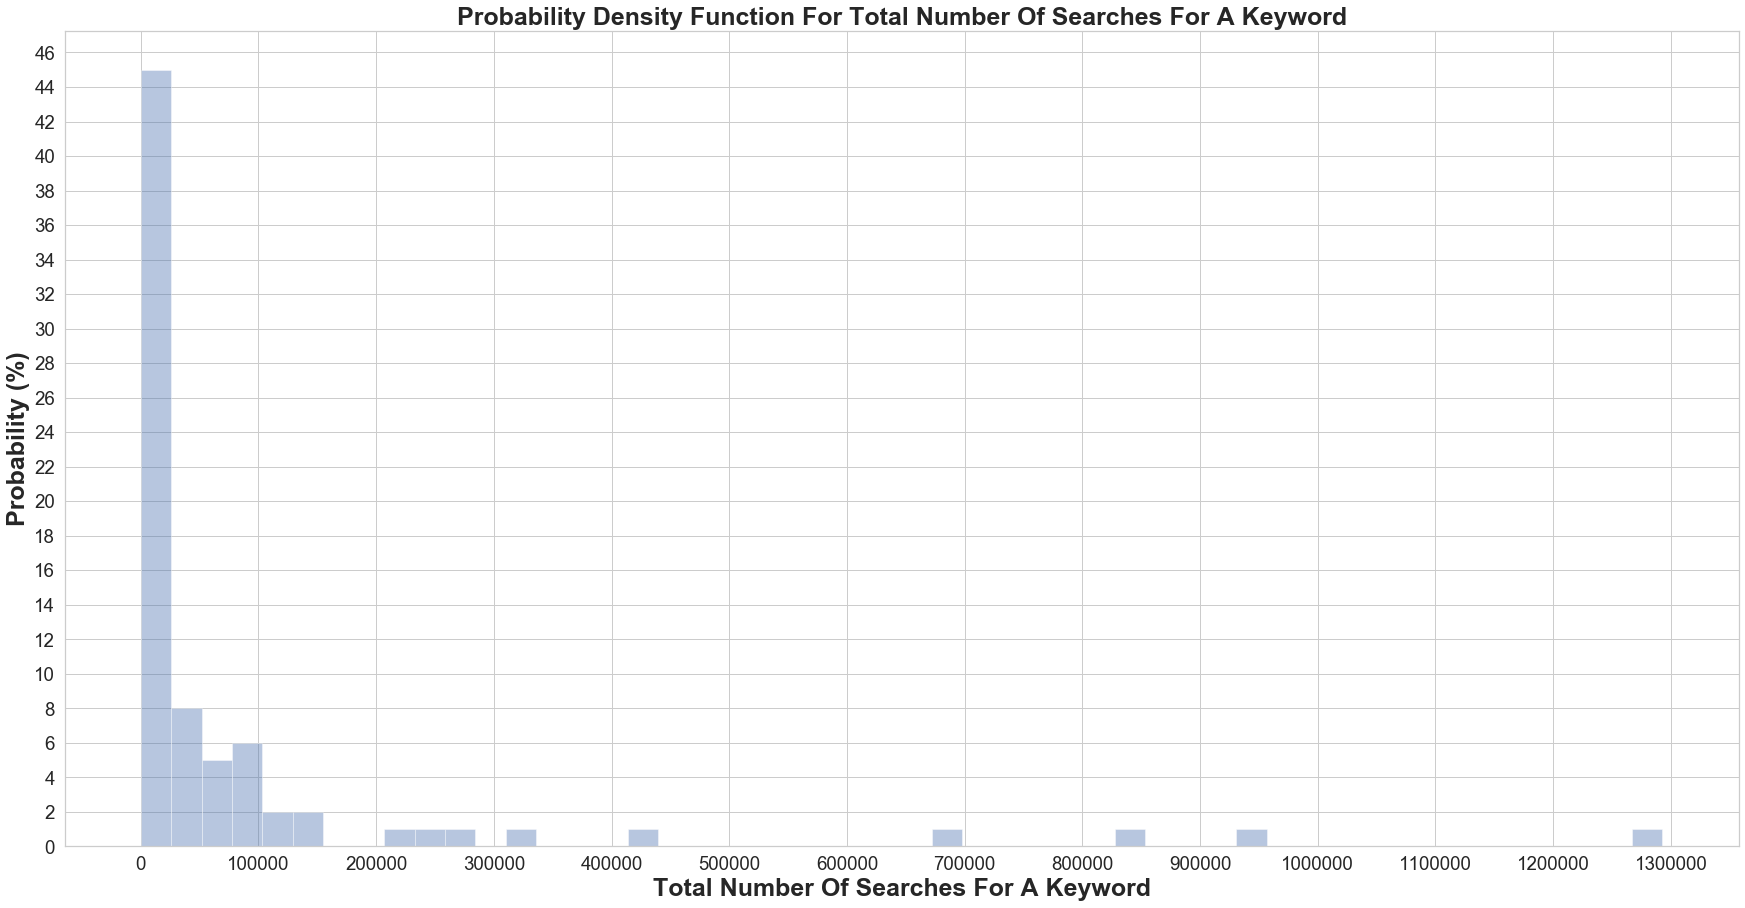

In [50]:
#see Probability Density Function of total volume across all engines

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(100000))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
sns.distplot(total_engines.total_volume_all_engines, kde=False, bins=50);
plt.xlabel('Total Number Of Searches For A Keyword', fontsize=25, weight = 'bold')
plt.ylabel('Probability (%)', fontsize=25, weight = 'bold')
plt.title('Probability Density Function For Total Number Of Searches For A Keyword', fontsize=25, weight = 'bold')
plt.show()

# plt.savefig('Probability Density Function For Total Number Of Searches For A Keyword.pdf', dpi=300)

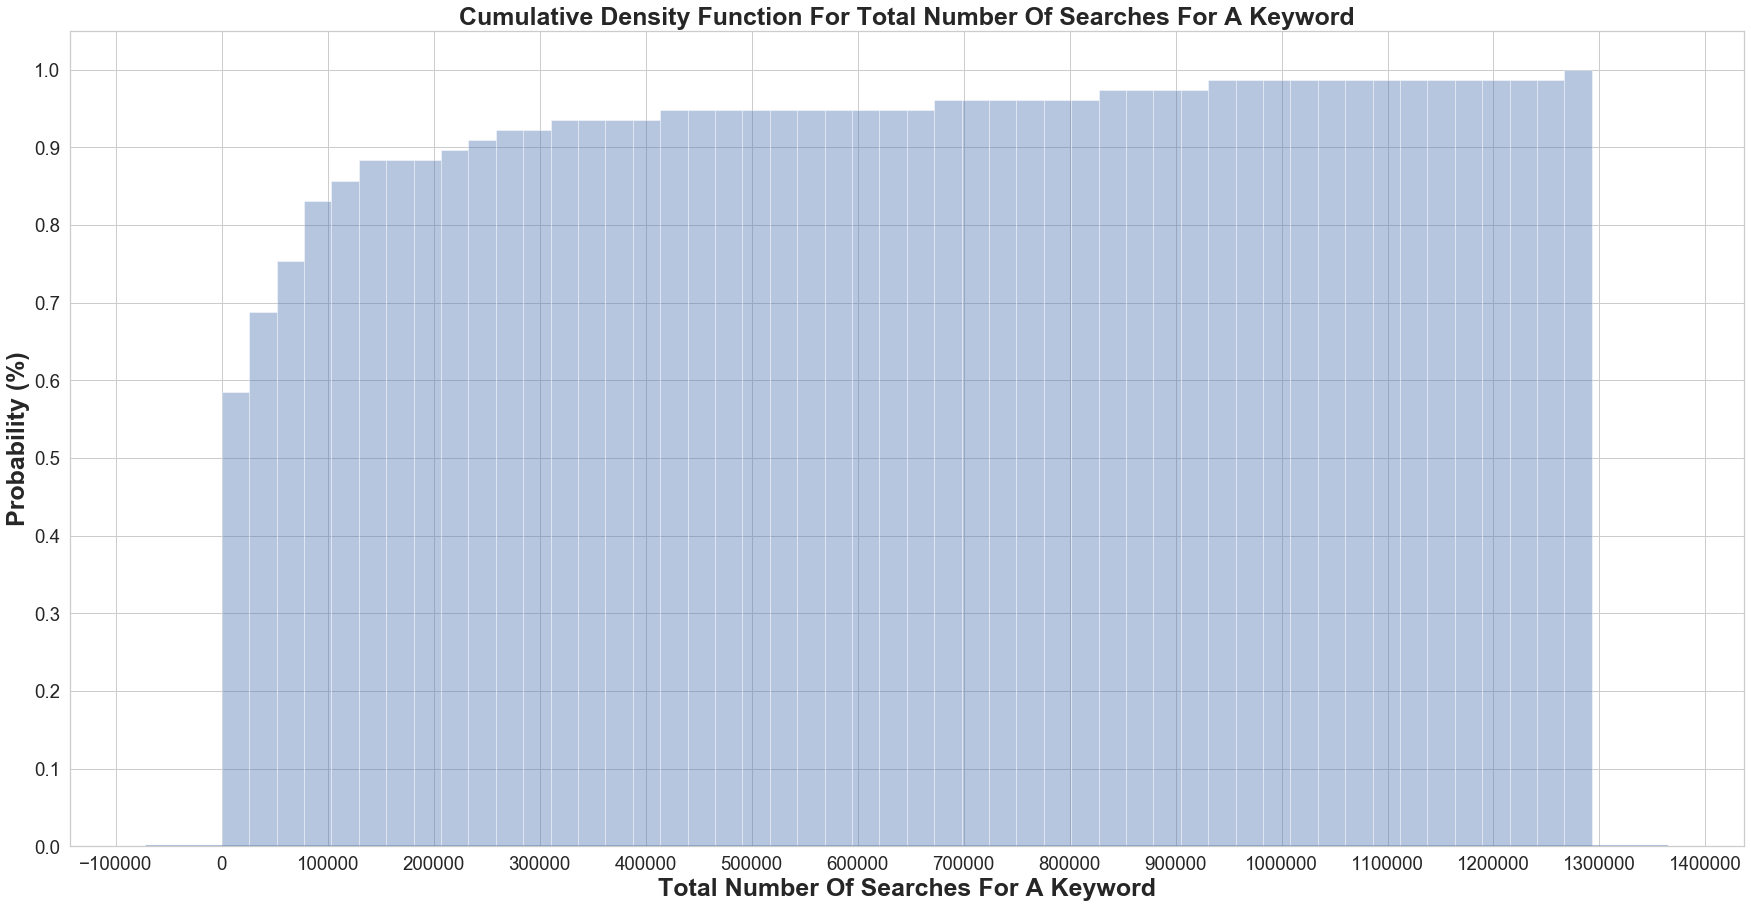

In [51]:
#see Cumulative Distribution Function of total volume across all engines

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(100000))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(.1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
sns.distplot(total_engines.total_volume_all_engines, hist_kws={'cumulative': True}, bins=50)
plt.xlabel('Total Number Of Searches For A Keyword', fontsize=25, weight = 'bold')
plt.ylabel('Probability (%)', fontsize=25, weight = 'bold')
plt.title('Cumulative Density Function For Total Number Of Searches For A Keyword', fontsize=25, weight = 'bold')
plt.show()

# plt.savefig('Cumulative Density Function For Total Number Of Searches For A Keyword.pdf', dpi=300)